In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
human_dna = pd.read_table('human_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human NA')

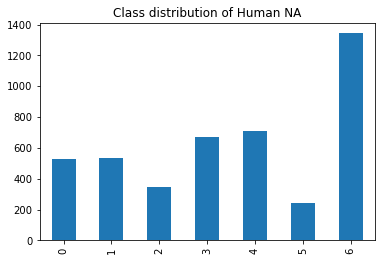

In [2]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human NA")

In [3]:
#lets descripe one dna sequence of human
one_dna = np.array(human_dna.head(1))
one_dna = str(one_dna).split(' ')
seq = one_dna[0].replace("[['",'')
seq = seq.replace("'",'')
print(seq)

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG



In [4]:
#create list of lovercase char and check if any char not in (a, c, g, t) put it as (z) char
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'z', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string
string_to_array(seq)

array(['a', 't', 'g', 'c', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a', 'a',
       'a', 't', 'a', 'c', 't', 'a', 'c', 'c', 'g', 't', 'a', 't', 'g',
       'g', 'c', 'c', 'c', 'a', 'c', 'c', 'a', 't', 'a', 'a', 't', 't',
       'a', 'c', 'c', 'c', 'c', 'c', 'a', 't', 'a', 'c', 't', 'c', 'c',
       't', 't', 'a', 'c', 'a', 'c', 't', 'a', 't', 't', 'c', 'c', 't',
       'c', 'a', 't', 'c', 'a', 'c', 'c', 'c', 'a', 'a', 'c', 't', 'a',
       'a', 'a', 'a', 'a', 't', 'a', 't', 't', 'a', 'a', 'a', 'c', 'a',
       'c', 'a', 'a', 'a', 'c', 't', 'a', 'c', 'c', 'a', 'c', 'c', 't',
       'a', 'c', 'c', 't', 'c', 'c', 'c', 't', 'c', 'a', 'c', 'c', 'a',
       'a', 'a', 'g', 'c', 'c', 'c', 'a', 't', 'a', 'a', 'a', 'a', 'a',
       't', 'a', 'a', 'a', 'a', 'a', 'a', 't', 't', 'a', 't', 'a', 'a',
       'c', 'a', 'a', 'a', 'c', 'c', 'c', 't', 'g', 'a', 'g', 'a', 'a',
       'c', 'c', 'a', 'a', 'a', 'a', 't', 'g', 'a', 'a', 'c', 'g', 'a',
       'a', 'a', 'a', 't', 'c', 't', 'g', 't', 't', 'c', 'g', 'c

In [5]:

from sklearn import preprocessing

def ordinal_encoder(my_array):
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(np.array(['a','c','g','t','z']))
  integer_encoded = label_encoder.transform(my_array)
  print(integer_encoded)
  float_encoded = integer_encoded.astype(float)
  float_encoded[float_encoded == 0] = 0.25 # A
  float_encoded[float_encoded == 1] = 0.50 # C
  float_encoded[float_encoded == 2] = 0.75 # G
  float_encoded[float_encoded == 3] = 1.00 # T
  float_encoded[float_encoded == 4] = 0.00 # anything else, lets say z
  return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'attcgxffgtg'
ordinal_encoder(string_to_array(seq_test))

[0 3 3 1 2 4 4 4 2 3 2]


array([0.25, 1.  , 1.  , 0.5 , 0.75, 0.  , 0.  , 0.  , 0.75, 1.  , 0.75])

In [25]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(np.array(['a','c','g','t','z']))
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse_output=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    return onehot_encoded
#So let’s try it out with a simple short sequence:
seq_test = 'attcxxxzzgtg'
one_hot_encoder(string_to_array(seq_test))



array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

In [7]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [8]:
#apply kmers function to all datasets & join all words to list 
#then add words column & drop sequence column
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)




In [9]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [10]:
#apply to human
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

print(y_human)

[4 4 3 ... 6 6 6]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X_human = cv.fit_transform(human_texts)




In [12]:
print(X_human.shape)


(4380, 232414)


In [13]:
# Splitting the human dataset into the training set and test set with (80% train & 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human,y_human,test_size = 0.20,random_state=42)

In [14]:
#The fit method of SVC class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
#The fit method of KNN class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# enter all test datatest in model  
y_pred_svc = svclassifier.predict(X_test)

In [17]:
# enter all test datatest in model 
y_pred_knn = KNNclassifier.predict(X_test) 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print("SVM MODEL")
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

SVM MODEL
[[ 86   1   0   2   3   0  10]
 [  0  95   0   1   0   0  10]
 [  0   1  68   2   0   0   7]
 [  0   0   0 114   1   0  10]
 [  1   0   0   1 130   0  17]
 [  0   0   0   0   0  42   9]
 [  0   0   0   0   0   0 265]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       102
           1       0.98      0.90      0.94       106
           2       1.00      0.87      0.93        78
           3       0.95      0.91      0.93       125
           4       0.97      0.87      0.92       149
           5       1.00      0.82      0.90        51
           6       0.81      1.00      0.89       265

    accuracy                           0.91       876
   macro avg       0.96      0.89      0.92       876
weighted avg       0.93      0.91      0.91       876



In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print("KNN MODEL")
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

KNN MODEL
[[ 74   0   0   0   0   0  28]
 [  0  84   0   0   0   0  22]
 [  6   0  61   0   0   0  11]
 [  0   0   0 106   0   0  19]
 [ 10   0   0   0  98   0  41]
 [  3   0   0   0   0  34  14]
 [  0   0   0   0   0   0 265]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       1.00      0.79      0.88       106
           2       1.00      0.78      0.88        78
           3       1.00      0.85      0.92       125
           4       1.00      0.66      0.79       149
           5       1.00      0.67      0.80        51
           6       0.66      1.00      0.80       265

    accuracy                           0.82       876
   macro avg       0.92      0.78      0.83       876
weighted avg       0.87      0.82      0.83       876



In [31]:
from sklearn.ensemble import RandomForestClassifier


# Apply Random Forest to Human Data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf_human = rf_classifier.predict(X_test)

# Evaluate Random Forest Results for Human Data
print("\nHuman Results (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf_human))
print(classification_report(y_test, y_pred_rf_human))


Human Results (Random Forest):
[[ 95   1   0   2   1   0   3]
 [  3  95   0   3   1   0   4]
 [  1   0  71   1   0   0   5]
 [  1   0   0 119   0   0   5]
 [  7   0   0   3 133   0   6]
 [  3   0   0   3   0  41   4]
 [ 11   0   0   1   0   0 253]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       102
           1       0.99      0.90      0.94       106
           2       1.00      0.91      0.95        78
           3       0.90      0.95      0.93       125
           4       0.99      0.89      0.94       149
           5       1.00      0.80      0.89        51
           6       0.90      0.95      0.93       265

    accuracy                           0.92       876
   macro avg       0.94      0.91      0.92       876
weighted avg       0.93      0.92      0.92       876



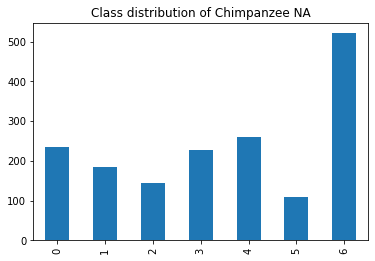

In [26]:
# Load Chimpanzee Data
chimp_dna = pd.read_table('chimp_data.txt')
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee NA")
plt.show()

In [27]:
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

# Convert k-mer words to numerical features using CountVectorizer
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])

X_chimp = cv.transform(chimp_texts)

# Split the chimp dataset into training and test sets
X_train_chimp, X_test_chimp, y_train_chimp, y_test_chimp = train_test_split(X_chimp, chimp_dna['class'], test_size=0.20, random_state=42)

# Apply SVM and KNN to Chimp Data
y_pred_svm_chimp = svclassifier.predict(X_test_chimp)
y_pred_knn_chimp = KNNclassifier.predict(X_test_chimp)

# Evaluate Chimp Results
print("\nChimpanzee Results:")
print("SVM Results:")
print(confusion_matrix(y_test_chimp, y_pred_svm_chimp))
print(classification_report(y_test_chimp, y_pred_svm_chimp))

print("K-NN Results:")
print(confusion_matrix(y_test_chimp, y_pred_knn_chimp))
print(classification_report(y_test_chimp, y_pred_knn_chimp))


Chimpanzee Results:
SVM Results:
[[ 26   1   0   0   0   0   1]
 [  0  37   0   1   0   0   1]
 [  0   0  27   0   0   0   0]
 [  0   0   0  42   0   0   1]
 [  0   0   0   0  51   0   1]
 [  0   0   0   0   0  29   0]
 [  0   0   0   0   0   0 119]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.97      0.95      0.96        39
           2       1.00      1.00      1.00        27
           3       0.98      0.98      0.98        43
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98       119

    accuracy                           0.98       337
   macro avg       0.99      0.98      0.98       337
weighted avg       0.98      0.98      0.98       337

K-NN Results:
[[ 25   0   0   0   0   0   3]
 [  0  34   0   0   0   0   5]
 [  0   0  26   0   0   0   1]
 [  0   0   0  42   0   0   1]
 [  2   0   0

In [32]:
# Apply Random Forest to Chimpanzee Data
y_pred_rf_chimp = rf_classifier.predict(X_test_chimp)

# Evaluate Random Forest Results for Chimpanzee Data
print("\nChimpanzee Results (Random Forest):")
print(confusion_matrix(y_test_chimp, y_pred_rf_chimp))
print(classification_report(y_test_chimp, y_pred_rf_chimp))


Chimpanzee Results (Random Forest):
[[ 28   0   0   0   0   0   0]
 [  0  39   0   0   0   0   0]
 [  0   0  27   0   0   0   0]
 [  0   0   0  43   0   0   0]
 [  1   0   0   2  48   0   1]
 [  0   0   0   1   0  28   0]
 [  0   0   0   0   0   0 119]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        27
           3       0.93      1.00      0.97        43
           4       1.00      0.92      0.96        52
           5       1.00      0.97      0.98        29
           6       0.99      1.00      1.00       119

    accuracy                           0.99       337
   macro avg       0.98      0.98      0.98       337
weighted avg       0.99      0.99      0.99       337



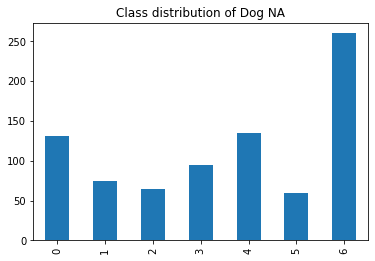

In [28]:
# Load Dog Data
dog_dna = pd.read_table('dog_data.txt')
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog NA")
plt.show()

In [29]:
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

# Convert k-mer words to numerical features using CountVectorizer
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])

X_dog = cv.transform(dog_texts)

# Split the dog dataset into training and test sets
X_train_dog, X_test_dog, y_train_dog, y_test_dog = train_test_split(X_dog, dog_dna['class'], test_size=0.20, random_state=42)

# Apply SVM and KNN to Dog Data
y_pred_svm_dog = svclassifier.predict(X_test_dog)
y_pred_knn_dog = KNNclassifier.predict(X_test_dog)

# Evaluate Dog Results
print("\nDog Results:")
print("SVM Results:")
print(confusion_matrix(y_test_dog, y_pred_svm_dog))
print(classification_report(y_test_dog, y_pred_svm_dog))

print("K-NN Results:")
print(confusion_matrix(y_test_dog, y_pred_knn_dog))
print(classification_report(y_test_dog, y_pred_knn_dog))


Dog Results:
SVM Results:
[[19  0  0  0  6  0  2]
 [ 0 16  0  0  2  0  1]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0  7  9  0  0]
 [ 0  0  0  0 21  0  2]
 [ 0  0  0  0  2  9  2]
 [ 0  0  0  0  1  1 50]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.83        27
           1       1.00      0.84      0.91        19
           2       1.00      1.00      1.00        14
           3       1.00      0.44      0.61        16
           4       0.51      0.91      0.66        23
           5       0.90      0.69      0.78        13
           6       0.88      0.96      0.92        52

    accuracy                           0.83       164
   macro avg       0.90      0.79      0.82       164
weighted avg       0.88      0.83      0.83       164

K-NN Results:
[[ 3  0  0  0  0  0 24]
 [ 0  4  0  0  0  0 15]
 [ 1  0  5  0  0  0  8]
 [ 0  0  0  2  0  0 14]
 [ 1  0  0  0  4  0 18]
 [ 2  0  0  0  0  3  8]
 [ 0  0  0  0  0  0 52]]
              precision 

In [33]:
# Apply Random Forest to Dog Data
y_pred_rf_dog = rf_classifier.predict(X_test_dog)

# Evaluate Random Forest Results for Dog Data
print("\nDog Results (Random Forest):")
print(confusion_matrix(y_test_dog, y_pred_rf_dog))
print(classification_report(y_test_dog, y_pred_rf_dog))


Dog Results (Random Forest):
[[23  0  0  2  1  0  1]
 [ 0 15  0  1  0  0  3]
 [ 0  0 12  0  0  0  2]
 [ 0  0  0 15  0  0  1]
 [ 0  0  0  3 18  0  2]
 [ 5  0  0  1  0  5  2]
 [ 0  0  0  1  0  0 51]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       1.00      0.79      0.88        19
           2       1.00      0.86      0.92        14
           3       0.65      0.94      0.77        16
           4       0.95      0.78      0.86        23
           5       1.00      0.38      0.56        13
           6       0.82      0.98      0.89        52

    accuracy                           0.85       164
   macro avg       0.89      0.80      0.82       164
weighted avg       0.87      0.85      0.84       164

